2017
华华

## 数据探索

数据探索：
	通过检验数据集的数据质量、 绘制图表、 计算某些特征量等手段， 对样本数据集的结构和规律进行分析的过程就是数据探索。
	数据探索有助于选择合适的数据预处理和建模方法， 甚至可以完成一些通常由数据挖掘解决的问题。
		

		
数据探索可以从数据质量分析和数据特征分析这两个角度来进行


数据质量分析：数据预处理的前提，数据挖掘分析结论有效性和准确性的基础


数据质量分析的主要任务是：检查原始数据是否存在脏数据。

脏数据：不符合要求，以及不能直接进行相应分析的数据。包括：缺失值、异常值、不一致的值。重复数据以及特殊符号的数据。


缺失值的分析：

数据的缺失主要包括记录的缺失和记录中某个字段信息的缺失。
（1） 缺失值产生的原因
	1） 有些信息暂时无法获取， 或者获取信息的代价太大。
	2） 有些信息是被遗漏的。 可能是因为输入时认为不重要、 忘记填写或对数据理解错误等一些人为因素而遗漏， 也可能是由于数据采集设备的故障、 存储
		介质的故障、 传输媒体的故障等非人为原因而丢失。
	3） 属性值不存在。 在某些情况下， 缺失值并不意味着数据有错误。 对一些对象来说某些属性值是不存在的， 如一个未婚者的配偶姓名、 一个儿童的固定
		收入等。
		
（2） 缺失值的影响
	1） 数据挖掘建模将丢失大量的有用信息。
	2） 数据挖掘模型所表现出的不确定性更加显著， 模型中蕴涵的规律更难把握。
	3） 包含空值的数据会使建模过程陷入混乱， 导致不可靠的输出。
	
（3） 缺失值的分析
	使用简单的统计分析， 可以得到含有缺失值的属性的个数， 以及每个属性的未缺失数、 缺失数与缺失率等。
	
缺失值的处理分为删除存在缺失值的记录、对可能值进行插补和不处理3种情况


异常值的分析：

异常值的分析是：检验数据是否有录入错误以及含有不合常理的数据。

异常值是指样本中的个别值，其数据明显偏离其余的观测值，也称为离群点，所以也叫离群点的分析。
有以下方法：

（1） 简单统计量分析
	可以先对变量做一个描述性统计， 进而查看哪些数据是不合理的。 最常用的统计量是最大值和
	最小值， 用来判断这个变量的取值是否超出了合理的范
	围。 如客户年龄的最大值为199岁， 则该变量的取值存在异常。
（2） 3σ原则
	如果数据服从正态分布， 在3σ原则下， 异常值被定义为一组测定值中与平均值的偏差超过3倍标准差的值。 在正态
	分布的假设下， 距离平均值3σ之外的值出现的概率为P（ ｜x-μ｜>3σ） ≤0.003， 属于极个别的小概率事件。
	如果数据不服从正态分布， 也可以用远离平均值的多少倍标准差来描述。
	
（3）箱型图分析：
	箱型图提供了识别异常值的一个标准： 异常值通常被定义为小于QL －1.5IQR或大于QU ＋1.5IQR的值。 
	QL 称为下四分位数， 表	示全部观察值中有四分之
	一的数据取值比它小； QU 称为上四分位数， 表示全部观察值中有四分之一的数据取值比它大； 
	IQR称为四分位数间距， 是上四	分位数QU 与下四分位数QL 之
	差， 其间包含了全部观察值的一半。

In [123]:
import pandas as pd
catering_sale='E://learnFile//chapter3//demo//data/catering_sale.xls'
data=pd.read_excel(catering_sale,index_col='日期')#指定日期为索引列
data.info()  #查看数据信息

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2015-03-01 to 2014-08-02
Data columns (total 1 columns):
销量    200 non-null float64
dtypes: float64(1)
memory usage: 3.1 KB


In [124]:
data.describe()#查看数据集的一些基本统计量

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [125]:
data.columns#查看有多少个特征向量

Index(['销量'], dtype='object')

In [126]:
len(data)#查看总共有多少条数据

201

### 箱型图来检测异常值

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
catering_sale='E://learnFile//chapter3//demo//data/catering_sale.xls'
data=pd.read_excel(catering_sale)

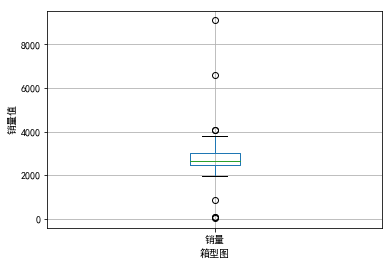

In [128]:
#把list导入到pandas的数据结构中，dataframe
data = pd.DataFrame({"销量":data['销量']})
data.boxplot()#这里，pandas自己有处理的过程，很方便哦。
plt.ylabel("销量值")
plt.xlabel("箱型图")#我们设置横纵坐标的标题。
plt.show()

## 数据特征分析

数据特征分析：通过绘制图表、 计算某些特征量等手段进行数据的特征分析。


数据特征分析包括：
	1、分布分析：
		分布分析能揭示数据的分布特征和分布类型。 对于定量数据， 欲了解其分布形式是对称的
		还是非对称的， 发现某些特大或特小的可疑值， 可通过绘制频率分布表、 绘制频率分布直方
		图、 绘制茎叶图进行直观地分析； 对于定性分类数据， 可用饼图和条形图直观地显示分布情况。
		
		1）、定量数据的分布分析
		2）、定性数据的分布分析

	2、对比分析：
		1）、绝对值比较
		2）、相对值比较
		
	3、统计量分析：
		1）、集中趋势度量
		2）、离中趋势度量
		
	4、周期性分析
	
	5、贡献度分析
	
	6、相关性分析
		1）、直接绘制散点图
		2）、绘制散点图矩阵
		3）、计算相关系数

		


1.定量数据的分布分析
	对于定量变量而言， 选择“组数”和“组宽”是做频率分布分析时最主要的问题， 一般按照以下步骤进行。
	1） 求极差。
	2） 决定组距与组数。
	3） 决定分点。
	4） 列出频率分布表。
	5） 绘制频率分布直方图。
	
	遵循的主要原则如下：
	1） 各组之间必须是相互排斥的。
	2） 各组必须将所有的数据包含在内。
	3） 各组的组宽最好相等。


2.定性数据的分布分析
	对于定性变量， 常常根据变量的分类类型来分组， 可以采用饼图和条形图来描述定性变量的分布。
	饼图的每一个扇形部分代表每一类型的百分比或频数， 根据定性变量的类型数目将饼图分成几个部分， 
	每一部分的大小与每一类型的频数成正比； 条形图的高度代表每一类型的百分比
	或频数， 条形图的宽度没有意义


		
统计量分析
	用统计指标对定量数据进行统计描述， 常从集中趋势和离中趋势两个方面进行分析。
	平均水平的指标是对个体集中趋势的度量， 使用最广泛的是均值和中位数； 反映变异程度的指标则
	是对个体离开平均水平的度量， 使用较广泛的是标准差（ 方差） 、 四分位间距。
	1、集中趋势度量：均值、中位数、众数。
	2、离中趋势度量：极差、标准差、变异系数（度量标准差相对于均值的离中趋势）、四分位数间距。

	
四分位数间距：
	四分位数包括上四分位数和下四分位数。 将所有数值由小到大排列并分成四等份， 处于第一个分割点位置的数值是下四分位数， 处于第二个分割点位置（ 中间位置） 的数值是中位数，
	处于第三个分割点位置的数值是上四分位数。	
四分位数间距， 是上四分位数QU 与下四分位数QL 之差， 其间包含了全部观察值的一半。 其值越大， 说明数据的变异程度越大； 反之， 说明变异程度越小。


## 相关统计量分析

In [129]:
#-*- coding:utf-8 -*-
import pandas as pd
catering_sale='E://learnFile//chapter3//demo//data/catering_sale.xls'
data=pd.read_excel(catering_sale)
data=data[(data['销量']>400)&(data['销量']<5000)]#过滤异常数据

In [130]:
data.max()

日期    2015-02-28 00:00:00
销量                 4065.2
dtype: object

In [131]:
data.min()

日期    2014-08-02 00:00:00
销量                    865
dtype: object

In [132]:
statistics=data.describe()

In [133]:
statistics.loc['count']#根据索引选择

销量    195.0
Name: count, dtype: float64

In [134]:
statistics.loc['range']=statistics.loc['max']-statistics.loc['min']
statistics.loc['var']=statistics.loc['std']/statistics.loc['mean']
statistics.loc['dis']=statistics.loc['75%']-statistics.loc['25%']

In [135]:
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000
range,3200.200000
var,0.154755


周期性分析是探索某个变量是否随着时间变化而呈现出某种周期变化趋势。 时间尺度相对较长的周期性趋势有年度
周期性趋势、 季节性周期趋势， 相对较短的有月度周期性趋势、 周度
周期性趋势， 甚至更短的天、 小时周期性趋势。

贡献度分析又称帕累托分析， 它的原理是帕累托法则， 又称20/80定律。 同样的投入放在不同的地方会产生不同
的效益。 例如， 对一个公司来讲， 80%的利润常常来自于20%最畅销的产
品， 而其他80%的产品只产生了20%的利润。


## 绘制帕累托图

In [136]:
#-*- coding:utf-8 -*-
import pandas as pd
dish_profit='E://learnFile//chapter3//demo//data/catering_dish_profit.xls'
data=pd.read_excel(dish_profit,index_col='菜品名')

In [137]:
data=data['盈利'].copy()

In [138]:
data

菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64

In [139]:
data.sort(ascending=False)#降序排序，true为升序排序

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [140]:
data

菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64

In [141]:
import matplotlib.pyplot as plt  #导入图像库
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
plt.figure()
data.plot(kind='bar')
plt.ylabel('盈利')

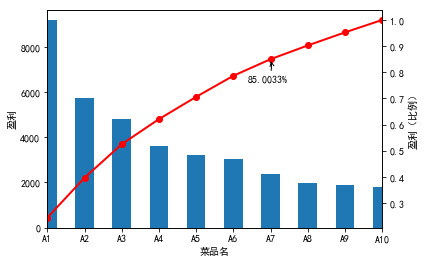

In [142]:
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）')
plt.show()

## 分析连续变量之间线性相关程度的强弱， 并用适当的统计指标表示出来的过程称为相关分析。

为了更加准确地描述变量之间的线性相关程度， 可以通过计算相关系数来进行相关分析。 在二元变量的相关分析过程中比较常用的有Pearson相关系数、 Spearman秩相关系数和判定系数。

In [143]:
#-*- coding:utf-8 -*-
import pandas as pd
catering_sale='E://learnFile//chapter3//demo//data/catering_sale_all.xls'

In [144]:
data=pd.read_excel(catering_sale,index_col='日期')
print(data)

            百合酱蒸凤爪  翡翠蒸香茜饺  金银蒜汁蒸排骨  乐膳真味鸡  蜜汁焗餐包  生炒菜心  铁板酸菜豆腐  香煎韭菜饺  香煎罗卜糕  \
日期                                                                              
2015-01-01      17       6        8     24   13.0    13      18     10     10   
2015-01-02      11      15       14     13    9.0    10      19     13     14   
2015-01-03      10       8       12     13    8.0     3       7     11     10   
2015-01-04       9       6        6      3   10.0     9       9     13     14   
2015-01-05       4      10       13      8   12.0    10      17     11     13   
2015-01-06      13      10       13     16    8.0     9      12     11      5   
2015-01-07       9       7       13      8    5.0     7      10      8     10   
2015-01-08       9      12       13      6    7.0     8       6     12     11   
2015-01-12       6       8        8      3    NaN     4       5      5      7   
2015-01-13       9      11       13      6    8.0     7       6      9      8   
2015-01-14       6       7  

In [145]:
print(data.corr())  #显示任意两个特征向量的相关系数

           百合酱蒸凤爪    翡翠蒸香茜饺   金银蒜汁蒸排骨     乐膳真味鸡     蜜汁焗餐包      生炒菜心    铁板酸菜豆腐  \
百合酱蒸凤爪   1.000000  0.009206  0.016799  0.455638  0.098085  0.308496  0.204898   
翡翠蒸香茜饺   0.009206  1.000000  0.304434 -0.012279  0.058745 -0.180446 -0.026908   
金银蒜汁蒸排骨  0.016799  0.304434  1.000000  0.035135  0.096218 -0.184290  0.187272   
乐膳真味鸡    0.455638 -0.012279  0.035135  1.000000  0.016006  0.325462  0.297692   
蜜汁焗餐包    0.098085  0.058745  0.096218  0.016006  1.000000  0.308454  0.502025   
生炒菜心     0.308496 -0.180446 -0.184290  0.325462  0.308454  1.000000  0.369787   
铁板酸菜豆腐   0.204898 -0.026908  0.187272  0.297692  0.502025  0.369787  1.000000   
香煎韭菜饺    0.127448  0.062344  0.121543 -0.068866  0.155428  0.038233  0.095543   
香煎罗卜糕   -0.090276  0.270276  0.077808 -0.030222  0.171005  0.049898  0.157958   
原汁原味菜心   0.428316  0.020462  0.029074  0.421878  0.527844  0.122988  0.567332   

            香煎韭菜饺     香煎罗卜糕    原汁原味菜心  
百合酱蒸凤爪   0.127448 -0.090276  0.428316  
翡翠蒸香茜饺   0.062344  0.270276 

In [146]:
data['百合酱蒸凤爪'].corr(data['翡翠蒸香茜饺'])#计算两个特征的相关系数

0.0092058030518364746

pandas的主要统计特征函数：
sum():按列计算数据样本的总和。
mean():计算数据样本的算数平均数。
var():计算数据样本的方差。
std():计算数据样本的标准差。
corr():计算数据样本的Spearman(Pearson)相关系数矩阵。
cov():计算数据样本的协方差矩阵。
skew():样本值得偏度(三阶矩)。
skew():样本值得峰度(四阶矩)。
describe():给出样本的描述。



·实例： 计算两个列向量的相关系数， 采用Spearman方法。
D = pd.DataFrame([range(1, 8), range(2, 9)]) #生成样本D， 一行为1~7， 一行为2~8
D.corr(method='spearson') #计算相关系数矩阵
S1 = D.loc[0] #提取第一行
S2 = D.loc[1] #提取第二行
S1.corr(S2, method='pearson') #计算S1、S2的相关系数


·实例： 计算6×5随机矩阵的协方差矩阵。
import numpy as np
D = pd.DataFrame(np.random.randn(6, 5)) #产生6×5随机矩阵
D.cov() #计算协方差矩阵
0 1 2 3 4
0 1.745257 -0.299968 0.850216 -0.484931 1.068187
1 -1.453670 1.460928 0.347299 1.585089 0.595347
2 -0.751128 0.504498 -1.244944 -0.672183 -0.595296
3 -0.423802 -1.086470 0.637264 0.873043 -0.506736
4 0.969907 0.721997 -0.550993 1.033300 -0.903234
5 -0.705159 0.385077 0.120580 0.347470 2.036798
D[0].cov(D[1]) #计算第一列和第二列的协方差
0.5


实例： 计算6×5随机矩阵的偏度（ 三阶矩） /峰度（ 四阶矩） 。
import numpy as np
D = pd.DataFrame(np.random.randn(6, 5)) #产生6×5随机矩阵
D.skew()

0 -0.210246
1 -0.348367
2 -1.152183
3 -0.378802
4 -0.859889
dtype: float64

D.kurt()


0 -0.191062
1 -1.831973
2 1.171797
3 -1.529854
4 1.494526
dtype: float64

实例： 给出6×5随机矩阵的describe。
import numpy as np
D = pd.DataFrame(np.random.randn(6, 5)) #产生
6×5随机矩阵
D.describe()
0 1 2 3 4
count 6.000000 6.000000 6.000000 6.000000 6.000000
mean 0.006958 -0.069822 0.113711 -0.168115 -0.584493
std 1.224979 1.017829 0.939980 1.173083 0.539911
min -1.777763 -1.330542 -1.512842 -1.674685 -1.507229
25% -0.669088 -0.937504 -0.202329 -1.109370 -0.721853
50% 0.176010 0.130924 0.472093 0.115791 -0.537366
75% 0.578993 0.650975 0.516907 0.538483 -0.305514
max 1.704960 1.119084 1.146215 1.272789 0.086585
